#### Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

#### Importing the Dataset

In [4]:
dataset = pd.read_csv('Weight-Height.csv')
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [16]:
dataset.shape

(10000, 3)

#### Checking the columns with outliers

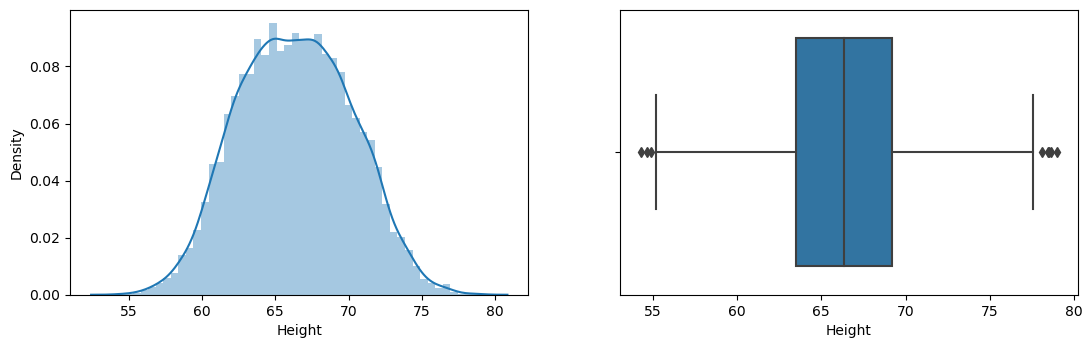

In [7]:
plt.figure(figsize=(13,3.7))
plt.subplot(1,2,1)
sns.distplot(dataset['Height'])

plt.subplot(1,2,2)
sns.boxplot(dataset['Height'])

plt.show()

### Detecting Outliers

In [10]:
dataset['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [11]:
upper_limit = dataset['Height'].quantile(0.99)
lower_limit = dataset['Height'].quantile(0.01)

In [12]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 74.7857900583366
Lower limit 58.13441158671655


In [13]:
dataset[(dataset['Height'] > upper_limit) | (dataset['Height'] < lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


### Removing Outliers

#### 1. Trimming

In [20]:
new_dataset = dataset[(dataset['Height'] <= upper_limit) & (dataset['Height'] >= lower_limit)]
new_dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [25]:
new_dataset['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [23]:
new_dataset.shape

(9800, 3)

#### Comparing data before and after removing outliers

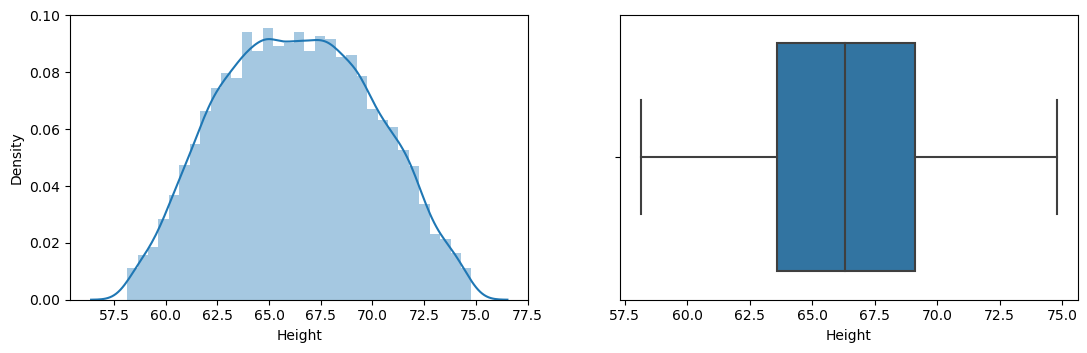

In [26]:
plt.figure(figsize=(13,3.7))
plt.subplot(1,2,1)
sns.distplot(new_dataset['Height'])

plt.subplot(1,2,2)
sns.boxplot(new_dataset['Height'])

plt.show()

#### 2. Capping

In [27]:
upper_limit = dataset['Height'].quantile(0.99)
lower_limit = dataset['Height'].quantile(0.01)

In [28]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 74.7857900583366
Lower limit 58.13441158671655


In [29]:
def limit(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [31]:
dataset['Height'] = dataset['Height'].apply(limit)

In [44]:
new_dataset2 = dataset[(dataset['Height'] <= upper_limit) & (dataset['Height'] >= lower_limit)]
new_dataset2
# As we can see there is no value in our age column now that is an outlier anymore so by capping we can replace the outliers and also not loose data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


#### Data after performing outlier removal

In [45]:
new_dataset2['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(dataset['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(dataset['placement_exam_marks'])